# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


In [2]:
# Your work here.
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


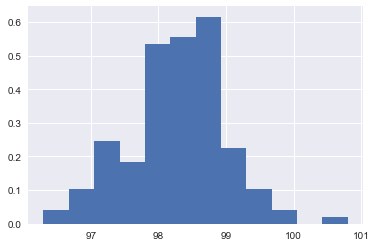

In [6]:
# distribution
plt.hist(df['temperature'], bins=12, normed=True)
plt.show()


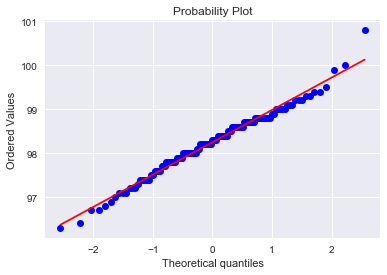

In [10]:
# quantile plot
stats.probplot(df['temperature'], dist="norm", plot=pylab)
plt.show()

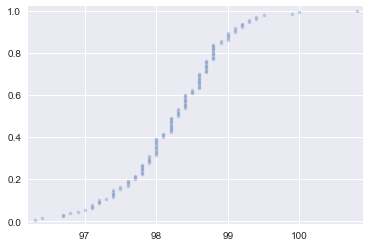

In [12]:
# ECDF plot
x,y = ecdf(df['temperature'])
plt.plot(x,y, linestyle='none', marker='.', alpha=0.3)
plt.margins(0.02)
plt.show()

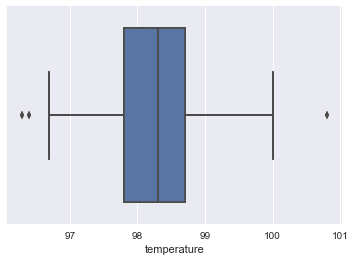

In [17]:
sns.boxplot(df['temperature'])
plt.show()


### 1. Is the distribution of body temperatures normal?

Judging by the plots above, it would appear as the distribution may be normal but difficult to confirm without further analysis as it does look a bit skewed. Although, if this is one of many samples, it would be reasonable to assume that at least one sample may be skewed and, therefore, at this point we cannot reject the idea that it is normally distributed.  


In [80]:
# test for normal distribution
# HO: the distribution is normal
# HA: distribution is not normal
# alpha = 0.05
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The resulting p-value of about 0.26 tells us that we cannot rejct the null hypothesis of the distribution being normal. Therefore, we accept the null hyposthesis, distribution is normal. 

### 2. Is the sample size large? Are the observations independent?
The sample size is relatively large and can represent the population. It is reasonable to assume that the temperatures are indepedent as one temperature should not have any effect upon another. 



### 3. Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  *t*  or  *z*  statistic?
* Now try using the other test. How is the result different? Why?

*H0*: population mean and sample mean are the same, both equal 98.6

*HA*: population mean and sample mean are not equal


In [24]:
# bootstrap hyposthesis test, one-sample
# Null Hypothesis: true pop mean and sample mean are equal
pop_mean = 98.6
sample_mean = np.mean(df['temperature'])
sample_temp = df['temperature'].values

np.random.seed(12)
# draw bootstrap samples
bs_replicates = np.empty(10000)
# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(sample_temp, len(sample_temp)))
np.mean(bs_replicates)
print('sample mean:', sample_mean)
print('sample standard deviation:', np.std(df['temperature']))

sample mean: 98.24923076923078
sample standard deviation: 0.7303577789050377


In [25]:
# compute fraction of reps leass than or equal to sample_mean
pr = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-value =', pr)

p-value = 0.0


The p-value is zero, therefore the population mean and the sample are not equal and the null hyposthesis must be rejected.

### *t* or *z* statistic?

Known: 
1. Sample standard deviation (0.73) and mean (98.2)
2. Population mean, 98.6


One-sample must be used because we are given only one sample and the mean of the population.

Z-statistic is appropriate when the population variance is known or the sample size is large. On the other hand, t-statistic is appropriate when the sample size is small and the population variance is unknown. 

In this case, one of two conditions are met for both *z* and *t* statistic so it is wise to compute both. 

In [26]:
t = (sample_mean-pop_mean) / (np.std(sample_temp)/np.sqrt(len(sample_temp)))

# critical t-value
t_crit = stats.t.ppf(0.05 / 2, len(sample_temp) - 1)
print(t)
print(t_crit)

-5.47592520208
-1.97852449146


In [27]:
# z-value
SE = np.std(sample_temp) / np.sqrt(len(sample_temp))
z = (sample_mean-pop_mean) / SE
z

-5.4759252020781153

The z-value tells us that the temperature would lie -5.48 standard deviations beyond the mean. Since our assumption is that we're dealing with a normal distribution we know that about 99% of values lie within 3 standard deviation of the mean. The z-value indicates that the value of 98.2 (mean of sample) is well outside the normal distribution and probability of obtaining that mean in any sample is extremely low.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  *t*  and  *z*  statistic?

In [28]:
temp_10 = df.temperature.sample(n=10).values

In [29]:
# t-value
t = (temp_10.mean() - pop_mean) / (np.std(temp_10)/np.sqrt(len(temp_10)))
t_crit = stats.t.ppf(0.05 / 2, len(temp_10) - 1)
print('t-value:', t)
print('critical t-value:', t_crit)


t-value: -1.86904965121
critical t-value: -2.26215716274


In [30]:
# z-value
SE = np.std(temp_10) / np.sqrt(len(temp_10))
z = (temp_10.mean() - pop_mean) / SE
print('z-value:', z)

z-value: -1.86904965121


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach
    
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    

In [43]:
# margin of error
margin_err = 1.96 * sample_temp.std() / np.sqrt(len(sample_temp))
print(margin_err)

0.125550964803


In [37]:
# draw bootstrap samples
bs_replicates = np.empty(10000)
# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(sample_temp, len(sample_temp)))
# 95% confidence interval
conf_int95 = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int95)
# 99% confidence interval
conf_int99 = np.percentile(bs_replicates, [0.05, 99.95])
print(conf_int99)

[ 98.12230769  98.37538462]
[ 98.01615154  98.45000192]


The population mean (98.6) is not contained within the 95% confidence interval computed from the sample replicates. If these techniques are repeated, the 95% confidence interval would indicate that the resulting means will lie within the interval 95% of the time. Thus far, all evidence from this sample indicates that the true population mean is not 98.6. 

According to the sample, 'abnormal' temperature values would be beyond the 95% confidence interval of 98.1 and 98.4 degrees.

### 6. Is there a significant difference between males and females in normal temperature?

* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

H0: no *signifficant difference* in mean body temperature between male and female 

HA: male and female body temp means are not equal

In [60]:
df.head()
male = df[df['gender']=='M'].temperature.values
female = df[df['gender']=='F'].temperature.values
print(len(male))
print(len(female))

65
65


In [62]:
print('male mean temp:', male.mean())
print('female mean temp:',female.mean())

male mean temp: 98.1046153846
female mean temp: 98.3938461538


In [68]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff
mean_diff = diff_of_means(male, female)
mean_diff

-0.28923076923076962

In [70]:
# calculate z-value, two_sample test
z = mean_diff / np.sqrt(((male.std() ** 2)/ len(male)) + ((female.std() ** 2)/ len(female)))
z


-2.3032202891943516

The z-value indicates that the mean difference is within 3 standard deviations but we need to compute the p-value.

In [73]:
pr = stats.norm.cdf(z) * 2
pr

0.021266451830110264

In [75]:
# create permuation samples and calculate difference between their means
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2


In [79]:
permuation_reps = draw_perm_reps(male, female, diff_of_means, size=10000)
pr = np.sum(permuation_reps >= np.abs(mean_diff)) / len(permuation_reps)
print('p-value:', pr)

p-value: 0.0119


The p-value is less than the threshold of 0.05, therefore, the null hypothesis must be rejected. There is a significant difference of means between male and female body temperature. 

For over 120 years, it has been widely accepted that the average human body temperature is about 98.6 degrees. However, after studying the evidence provided by a sample of 130 people, both men and women, we can conclude that the population mean temperature of 98.6 degrees is incorrect. The sample's average body temperature is calculated to be 98.2 degrees and is more likely to represent the population. Since it was 120 years ago, a discrepancy could have been due to the lack of accurate measuring equipment and perhaps a few outliers which could have skewed results.Ever since then it has been propagated until now. Still, it was quite close to the actual population mean.  

